In [4]:
import numpy as np
import pandas as pd
import scipy as sc
import math 
import matplotlib.pyplot as plt
from random import random
from sklearn import linear_model
import statsmodels.api as sm

### Loading Data

In [5]:
df = pd.read_excel(r'C:\Users\bramg\Documents\Education_7.xlsx').fillna(0)
df2 = pd.read_excel(r'C:\Users\bramg\Documents\Education_7.xlsx')

columns = list(df.columns)
print(columns)
vX = df[columns[5:7]]
vY = df[columns[11:13]]

vMath = df[['Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D']].to_numpy()
vLanguage = df[['Dutch', 'English']].to_numpy()
vOther = df[['Latin', 'Greek']].to_numpy()
vHS = df[['Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek']].to_numpy()
vUni = df[["Number of ECT's"]]

vUniMath = df[['Mathematics Univ']].to_numpy()
vUniDutch = df[['Dutch Univ']].to_numpy()

['Student', 'Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek', 'Studies', "Number of ECT's", 'Mathematics Univ', 'Dutch Univ']


In [6]:
def scatter(data1, data2):
    plt.scatter(data1, data2)
    plt.show()

In [7]:
def histogram(data1, data2):
    plt.hist(data1, bins=30, alpha=0.5)
    plt.hist(data2, bins=30, alpha=0.5)
    plt.show()

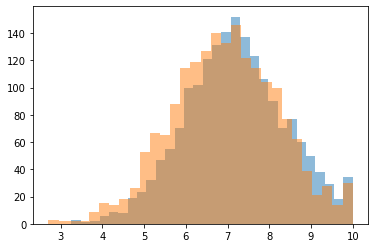


################################################################

       Mathematics A  Mathematics C  Mathematics B  Mathematics D  \
count     552.000000     374.000000     928.000000     404.000000   
mean        7.365036       7.417914       7.436099       7.546782   
std         1.487001       1.480970       1.485696       1.413271   
min         5.000000       5.000000       5.000000       5.000000   
25%         6.100000       6.025000       6.200000       6.300000   
50%         7.300000       7.450000       7.400000       7.600000   
75%         8.625000       8.675000       8.700000       8.700000   
max        10.000000      10.000000      10.000000      10.000000   

             Dutch      English       Latin       Greek  Number of ECT's  \
count  1854.000000  1854.000000  868.000000  868.000000      1854.000000   
mean      7.524865     7.538835    7.472696    7.534447        38.679612   
std       1.465815     1.464718    1.455342    1.462771        12.448354   
min    

In [8]:
def main():
    #descriptive anlaysis: 
    #scatter:
    histogram(vUniDutch, vUniMath)
    
    print("\n################################################################\n")
    print(df2.iloc[:,1:].describe())
main()

## Mutliple Linear Regression Model

In [43]:
def multiLinearRegression(X, y, features):
    X_1 = sm.add_constant(X)
    model = sm.OLS(y, X_1)
    results = model.fit()
    print(results.summary(xname=features))


In [62]:
vY = vUniMath
vX = vHS
features = ['Intercept','Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek']
print('OLS Dutch: \n')
multiLinearRegression(vX, vY, features)

OLS Dutch: 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     113.7
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          1.29e-154
Time:                        11:15:21   Log-Likelihood:                -2705.3
No. Observations:                1854   AIC:                             5429.
Df Residuals:                    1845   BIC:                             5478.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6101      0.2

In [53]:
vY = vUniMath
features = list(['Intercept', 'Mathematics A', 'Mathematics C', 'Mathematics B',
    'Mathematics D'])
vX = df[['Mathematics A', 'Mathematics C', 'Mathematics B',
    'Mathematics D']]
print('OLS Mathematics:\n')
multiLinearRegression(vX, vY, features)

OLS Mathematics:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     216.8
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          1.20e-152
Time:                        11:11:38   Log-Likelihood:                -2720.4
No. Observations:                1854   AIC:                             5451.
Df Residuals:                    1849   BIC:                             5478.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4614    

In [58]:
vY = vUniDutch
vX = vHS
features = ['Intercept','Mathematics A', 'Mathematics C', 'Mathematics B', 'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek']
print('OLS Dutch: \n')
multiLinearRegression(vX, vY, features)

OLS Dutch: 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     50.77
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.50e-74
Time:                        11:13:26   Log-Likelihood:                -2798.1
No. Observations:                1854   AIC:                             5614.
Df Residuals:                    1845   BIC:                             5664.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7691      0.2

In [64]:
vY = vUniMath
vX = vHS[0]
features = ['Intercept','Mathematics A']
print('OLS Dutch: \n')
multiLinearRegression(vX, vY, features)

OLS Dutch: 



ValueError: endog and exog matrices are different sizes

In [63]:
def correlationData(data): 
    correlation_df = data.corr()
    print(correlation_df) 

In [32]:
correlationData(df[['Mathematics A', 'Mathematics C', 'Mathematics B',
    'Mathematics D', 'Dutch', 'English', 'Latin', 'Greek','Mathematics Univ', 'Dutch Univ']])

                  Mathematics A  Mathematics C  Mathematics B  Mathematics D  \
Mathematics A          1.000000      -0.310589      -0.609850      -0.326917   
Mathematics C         -0.310589       1.000000      -0.472652      -0.253371   
Mathematics B         -0.609850      -0.472652       1.000000       0.505648   
Mathematics D         -0.326917      -0.253371       0.505648       1.000000   
Dutch                 -0.019103       0.016050       0.006902      -0.007507   
English                0.019725      -0.007046      -0.011283      -0.006195   
Latin                 -0.004497      -0.062371       0.062983       0.042596   
Greek                 -0.002304      -0.064101       0.056131       0.032926   
Mathematics Univ       0.083952       0.041801       0.105780      -0.064997   
Dutch Univ             0.082190       0.050344      -0.088938      -0.038656   

                     Dutch   English     Latin     Greek  Mathematics Univ  \
Mathematics A    -0.019103  0.019725 -0.0